In [3]:
# 1.) Feed the dataset directly intor the UCI website using pandas 
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [5]:
# 2.) Assign 30 features to a NumPy array x. transform from labels (strings) into integers 
from sklearn.preprocessing import LabelEncoder 
x = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

le.transform(['M', 'B'])


array([1, 0])

In [9]:
# 3.) Divide the data into seperate training dataset(80% of the data) test for 20% of the data
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [10]:
# combining transformers and estimators in a pipeline
# saves the steps of fitting and transforming the test and training dataset seperately
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', LogisticRegression(random_state=1))])

pipe_lr.fit(x_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(x_test, y_test))



Test Accuracy: 0.947


In [11]:
# disadvantage of the hold out method: Is that the performance estimate is sensitive to how the training set is partitioned into
# the training and validation subsets

In [12]:
# k-fold cross-validation 
# 10 is the average number of folds 
# use a larger number for a smaller dataset
# Special case: LOO(leave-one-out) cross validation method, set the number of folds equal to the number of training
# samples.
# => k = n 


In [14]:
# stratifiedFold is better than k-fold cross validation 
import numpy as np 
from sklearn.cross_validation import StratifiedKFold
# initialized and set the number of folds 
kfold = StratifiedKFold(y=y_train, n_folds=10, random_state=1)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(x_train[train], y_train[train]) # making sure its fitted and scaled appropriately
    score = pipe_lr.score(x_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))


print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold: 1, Class dist.: [256 153], Acc: 0.891
Fold: 2, Class dist.: [256 153], Acc: 0.978
Fold: 3, Class dist.: [256 153], Acc: 0.978
Fold: 4, Class dist.: [256 153], Acc: 0.913
Fold: 5, Class dist.: [256 153], Acc: 0.935
Fold: 6, Class dist.: [257 153], Acc: 0.978
Fold: 7, Class dist.: [257 153], Acc: 0.933
Fold: 8, Class dist.: [257 153], Acc: 0.956
Fold: 9, Class dist.: [257 153], Acc: 0.978
Fold: 10, Class dist.: [257 153], Acc: 0.956
CV accuracy: 0.950 +/- 0.029


In [18]:
# a more efficient way of doing it 
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=x_train, y=y_train, cv=10, n_jobs=1)


In [19]:
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [ 0.89130435  0.97826087  0.97826087  0.91304348  0.93478261  0.97777778
  0.93333333  0.95555556  0.97777778  0.95555556]


In [20]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.950 +/- 0.029


In [21]:
# n_jobs specifies how many cpus will be used for it if set to 1 then one CPU
# if set to -1 then all available cpus in parallel



In [22]:
# debugging algorithms with learning and validation curves 
# used to diagnose if the algorithm has a problem with a overfitting (high variance) or underfitting (high bias)

In [24]:
# using the learning curves from scikit
import matplotlib.pyplot as plt 
from sklearn.model_selection import learning_curve
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(penalty='l2', random_state=0))])

In [26]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=x_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

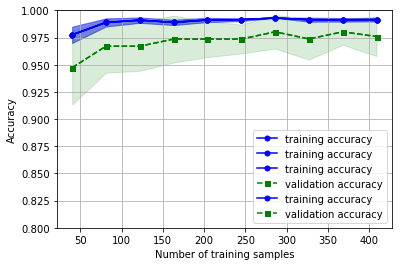

In [30]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()


In [31]:
# train_sizes=np.linspace(0.1,1.0,10) => 10 evenly spaced intervals for the training set sizes 
# learning_curve function uses stratified k-fold cross-validation to calculate the cross-validation accuracy
# it is slightly overfitting the test data due to the small gap


In [32]:
# validation curves which address overfitting and underfitting 
# varying the values of the model parameters 

In [56]:
from sklearn.learning_curve import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=x_train, y=y_train, param_name='clf__C', param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [57]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

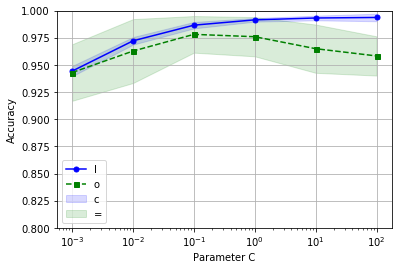

In [58]:
plt.grid()
plt.xscale('log')
plt.legend('loc=lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

In [65]:
# TUNING HYPERPARAMETERS VIA GRID SEARCH
# brute-force exhaustive search paradigm
# for a SVM algo
# determines the best parameters 
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range, 'clf__kernel': ['linear']}, {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

gs = gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.978021978021978
{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [66]:
clf = gs.best_estimator_ 
clf.fit(x_train, y_train)
print('Test accuracy: %.3f' % clf.score(x_test, y_test))

Test accuracy: 0.965


In [67]:
# nested cross-validation for when the dataset is big
# 5x2 cross-validation
# the outer loop is 3 loops of training and test datafolds: train with optimal parameters 
# the inner loop is 2 loops  uses k-fold cross-validation  on the training fold: tune parameters 



In [69]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1)
scores = cross_val_score(gs, x_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % ( np.mean(scores), np.std(scores)))

CV accuracy: 0.965 +/- 0.025


In [70]:
# comparing DecisionTreeClassifier against the SVC
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=[{'max_depth':[1,2,3,4,5,6,7, None]}], scoring='accuracy', cv=5)

scores = cross_val_score(gs, x_train, y_train, scoring='accuracy', cv=2)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy: 0.906 +/- 0.015


In [71]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
pipe_svc.fit(x_train, y_train)
y_pred = pipe_svc.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


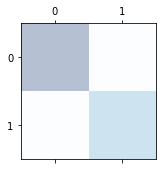

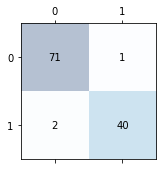

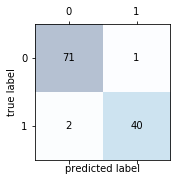

In [75]:
# can map it and show the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

#[[True Positives, False Negatives]]
#[[False Positives, True Negatives]]

In [76]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))

print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))



Precision: 0.976
F1: 0.964


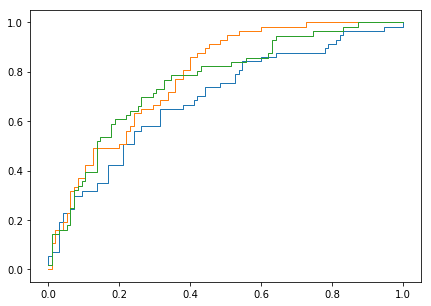

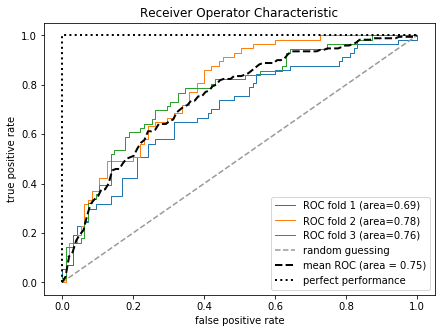

In [78]:
# plotting a receiver operating characteristic 
# plots the area under the curve to show the performance of the classification model 

from sklearn.metrics import roc_curve, auc
from scipy import interp 
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', LogisticRegression(penalty='l2', random_state=0, C=100.0))])

x_train2 = x_train[:, [4, 14]]
cv = StratifiedKFold(y_train, n_folds=3, random_state=1)
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(x_train2[train], y_train[train]).predict_proba(x_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area=%0.2f)' % (i+1, roc_auc))
    
plt.plot([0,1], [0,1], linestyle='--', color=(0.6,0.6,0.6), label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0,0,1], [0,1,1], lw=2, linestyle=':', color='black', label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc='lower right')
plt.show()

In [80]:
# ROC AUC score independently; mean ROC
# reporting the performance  of the algorithm 
pipe_lr = pipe_lr.fit(x_train2, y_train)
y_pred2 = pipe_lr.predict(x_test[:, [4, 14]])
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred2))

print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred2))

ROC AUC: 0.662
Accuracy: 0.711


In [ ]:
# micro-averaging: want to weight each instance or prediction equally
# macro-averaging: weights all classes equally to evaluate the overall performance of a classifier 